In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

In [166]:
epochs = 100
batch_size = 100

input_size = 2
bottleneck_size = 1
hidden_size = 20
layers = 10
# satisfactory performance with: hidden size = 20 layers = 10

In [132]:
class Autoencoder(nn.Module):
    def __init__(self, input_size = 2, \
                 bottleneck_size = 1,
                 hidden_size = 10, layers = 2):
        super(Autoencoder, self).__init__()
        # self.input_size = input_size
        # self.bottleneck_size = bottleneck_size
        # self.hidden_size = hidden_size
        # self.layers = layers
        encoder_mod = [
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            ]
        decoder_mod = [
            nn.Linear(bottleneck_size, hidden_size),
            nn.ReLU(),
        ]
        for _ in range(layers):
            encoder_mod.append(nn.Linear(hidden_size,hidden_size))
            encoder_mod.append(nn.ReLU())
            decoder_mod.append(nn.Linear(hidden_size,hidden_size))
            decoder_mod.append(nn.ReLU())
        encoder_mod += [nn.Linear(hidden_size, bottleneck_size), nn.ReLU()]
        decoder_mod += [nn.Linear(hidden_size, input_size)]
        self.encoder = nn.Sequential(*encoder_mod)
        self.decoder = nn.Sequential(*decoder_mod)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [167]:
X, _ = make_moons(n_samples=1000, noise=0.1)
autoencoder = Autoencoder(input_size = input_size, \
                 bottleneck_size = bottleneck_size,
                 hidden_size = hidden_size, layers = layers)
loss = nn.MSELoss()
train_loader = DataLoader(dataset = torch.from_numpy(X), batch_size = batch_size, shuffle = True)
optimizer = optim.Adam(autoencoder.parameters())

In [168]:
for epoch in range(epochs):
    for data in train_loader:
        inputs = data.float()
        
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss_val = loss(outputs, inputs)
        loss_val.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_val.item():.4f}')

Epoch [1/100], Loss: 0.6908
Epoch [2/100], Loss: 0.5963
Epoch [3/100], Loss: 0.5436
Epoch [4/100], Loss: 0.5502
Epoch [5/100], Loss: 0.5233
Epoch [6/100], Loss: 0.5469
Epoch [7/100], Loss: 0.4519
Epoch [8/100], Loss: 0.4905
Epoch [9/100], Loss: 0.4931
Epoch [10/100], Loss: 0.5324
Epoch [11/100], Loss: 0.4809
Epoch [12/100], Loss: 0.4734
Epoch [13/100], Loss: 0.4833
Epoch [14/100], Loss: 0.5511
Epoch [15/100], Loss: 0.5309
Epoch [16/100], Loss: 0.5204
Epoch [17/100], Loss: 0.4849
Epoch [18/100], Loss: 0.5382
Epoch [19/100], Loss: 0.5268
Epoch [20/100], Loss: 0.4852
Epoch [21/100], Loss: 0.4667
Epoch [22/100], Loss: 0.4978
Epoch [23/100], Loss: 0.4546
Epoch [24/100], Loss: 0.5212
Epoch [25/100], Loss: 0.4822
Epoch [26/100], Loss: 0.5394
Epoch [27/100], Loss: 0.4569
Epoch [28/100], Loss: 0.4913
Epoch [29/100], Loss: 0.4545
Epoch [30/100], Loss: 0.5628
Epoch [31/100], Loss: 0.5801
Epoch [32/100], Loss: 0.5160
Epoch [33/100], Loss: 0.5536
Epoch [34/100], Loss: 0.5259
Epoch [35/100], Loss: 0

Sometimes the loss decreases in a stable speed, while at certain times the loss does not decrease at all when the size of the neural network becomes too large.

In [169]:
# visualize effect of autoencoder
def plot_images(original, reconstructed):
    for i in range(len(original)):
        # print(original[i].numpy())
        plt.scatter(original[i].numpy()[0],original[i].numpy()[1], \
                    c = '#1f77b4')
        plt.scatter(reconstructed[i].numpy()[0], \
                    reconstructed[i].numpy()[1], c = '#ff7f0e')
    plt.show()

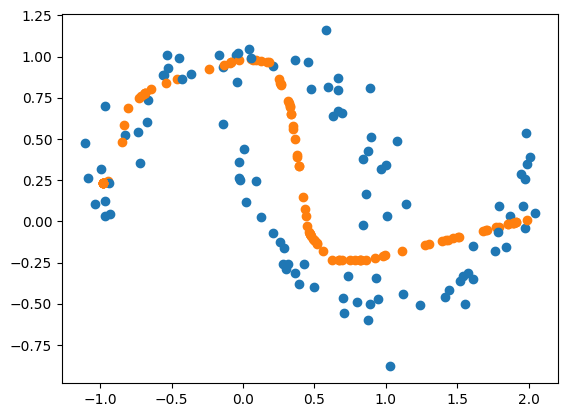

In [170]:
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.1)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder(test_data)
    plot_images(test_data, recon_data)

In [129]:
def histogram(X, BINS, visualize = False):
    # Create a 2D histogram
    hist, x_edges, y_edges = np.histogram2d(X[:, 0], X[:, 1], bins=BINS)
    # reserve the pdf for later use
    pdf = hist / hist.sum()
    if visualize:# Visualize the histogram
        plt.imshow(pdf, interpolation='nearest', origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
        plt.colorbar()
        plt.show()
    return pdf

In [130]:
# sample uniformly from the space
sample_temp_x = torch.from_numpy(np.random.uniform(
    low = [-1.5,-1],
    high = [2.5, 2], 
    size = (1000,2))).float()
sample_temp_x = autoencoder(sample_temp_x).detach().numpy()

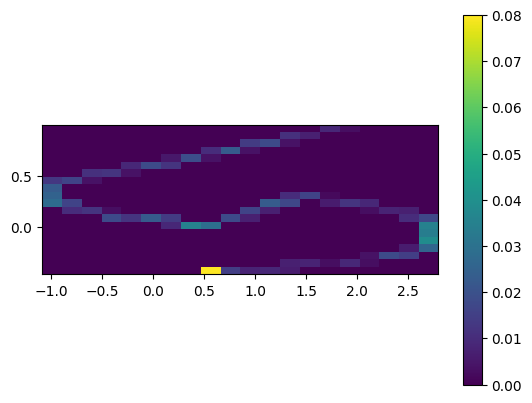

In [115]:
hist = histogram(sample_temp_x, 20, visualize = True)

In [172]:
from sklearn import mixture

In [ ]:
# TODO: fit GMM to the code dist. 
mixture.GaussianMixture

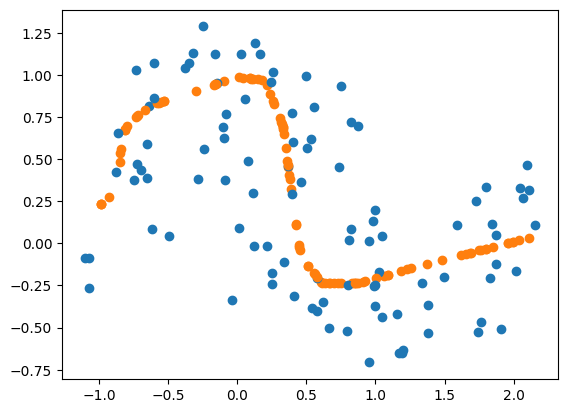

In [171]:
# noise level 0.2
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.2)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder(test_data)
    plot_images(test_data, recon_data)

In [116]:
# noise level 0.2: retraining
X_2, _ = make_moons(n_samples=1000, noise=0.2)
autoencoder_2 = Autoencoder(input_size = input_size, \
                 bottleneck_size = bottleneck_size,
                 hidden_size = 20, layers = layers)
loss = nn.MSELoss()
train_loader = DataLoader(dataset = X_2, batch_size = batch_size, shuffle = True)
optimizer = optim.Adam(autoencoder_2.parameters())
for epoch in range(epochs):
    for data in train_loader:
        inputs = data.float()
        optimizer.zero_grad()
        #print(inputs)
        outputs = autoencoder_2(inputs)
        loss_val = loss(outputs, inputs)
        loss_val.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_val.item():.4f}')

Epoch [1/100], Loss: 0.6883
Epoch [2/100], Loss: 0.6412
Epoch [3/100], Loss: 0.6671
Epoch [4/100], Loss: 0.6753
Epoch [5/100], Loss: 0.5608
Epoch [6/100], Loss: 0.5561
Epoch [7/100], Loss: 0.4782
Epoch [8/100], Loss: 0.4746
Epoch [9/100], Loss: 0.4884
Epoch [10/100], Loss: 0.5314
Epoch [11/100], Loss: 0.5477
Epoch [12/100], Loss: 0.5330
Epoch [13/100], Loss: 0.5203
Epoch [14/100], Loss: 0.5804
Epoch [15/100], Loss: 0.5190
Epoch [16/100], Loss: 0.5558
Epoch [17/100], Loss: 0.5570
Epoch [18/100], Loss: 0.4954
Epoch [19/100], Loss: 0.5768
Epoch [20/100], Loss: 0.5119
Epoch [21/100], Loss: 0.4945
Epoch [22/100], Loss: 0.5547
Epoch [23/100], Loss: 0.4883
Epoch [24/100], Loss: 0.5171
Epoch [25/100], Loss: 0.5784
Epoch [26/100], Loss: 0.5494
Epoch [27/100], Loss: 0.5468
Epoch [28/100], Loss: 0.5905
Epoch [29/100], Loss: 0.5234
Epoch [30/100], Loss: 0.5755
Epoch [31/100], Loss: 0.5115
Epoch [32/100], Loss: 0.5986
Epoch [33/100], Loss: 0.4778
Epoch [34/100], Loss: 0.6192
Epoch [35/100], Loss: 0

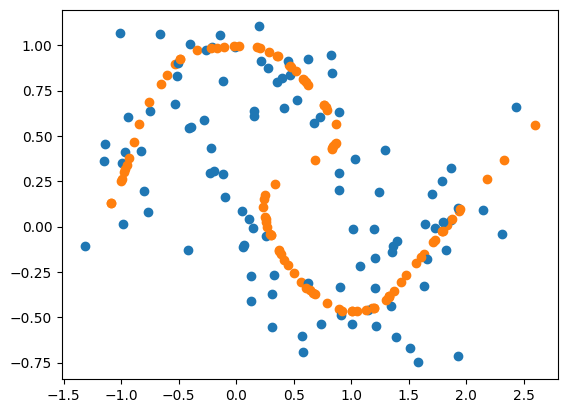

In [117]:
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.2)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder(test_data)
    plot_images(test_data, recon_data)

2. 2d without bottleneck